<a href="https://colab.research.google.com/github/EngrIBGIT/Classification_With_PyTorch/blob/main/Neural_Network_Classification_With_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification with PyTorch

**Classification** is a problem of predicting whether something is one thing or another (There are multiple items as options)

Resources:

* [NoteBookGuide](https://www.learnpytorch.io/02_pytorch_classification/)

* [Guide2](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/00_pytorch_classification.ipynb)



## Make classification Data:

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"First 5 samples of X: \n{X[:5]}")
print(f"First 5 samples of y : \n{y[:5]}")


First 5 samples of X: 
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y : 
[1 1 1 1 0]


In [5]:
# Make DataFrame of circle data

import pandas as pd
circle = pd.DataFrame({"X1": X[:, 0],
                       "X2": X[:, 1],
                       "label": y})
circle.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


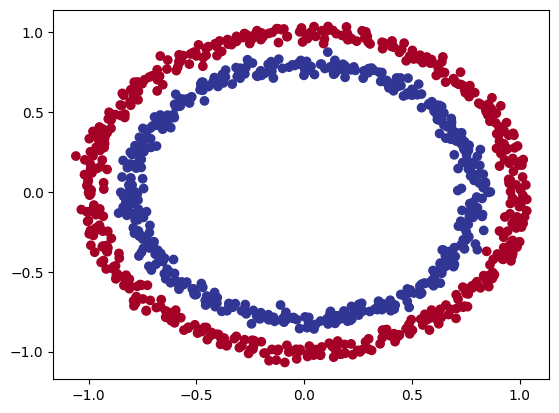

In [6]:
# Visualize
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

*Note:*

 Data is often reffered to as toy dataset, small enough to experiment on  and sizeable enough for practice fundamentals

## Check input and output shapes(because ML deal alot with numbers)

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# View first example of features and labels
X_sample = X[0]
y_sample = y[0]
# View first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one Sample of X: \n{X_sample} and the same for y: {y_sample}")
print(f"Shapes for one Sample of X: \n{X_sample.shape} and the same for y: {y_sample.shape}")


Values for one Sample of X: 
[0.75424625 0.23148074] and the same for y: 1
Shapes for one Sample of X: 
(2,) and the same for y: ()


## Turn data into tensors, create train and test splits

In [9]:
import torch
torch.__version__

'2.4.1+cu121'

In [10]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [11]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [12]:
type(X), X.dtype, type(y), y.dtype

(torch.Tensor, torch.float32, torch.Tensor, torch.float32)

In [13]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [14]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

Build a Model

Building a model to classify the blue and red circles.

To do so:

- Setup device agnostic code to run on accelerator (GPU) if there is one.
- Construct a model by (subclassing `nn.module`)
- Define loss function and optimizer
- Create training loop
- Create testing loop

In [15]:
# Import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [16]:
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

Device agnostic code is setup, now we can build a model

- Subclasses `nn.module`
- Create  `2 nn.Linear()` linear layers
- Define forward() method
- Instantiate model and send to device

In [17]:
# Construct model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # Create 2 nn.Layer capable of handling the shapes of data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # Takes in 2 features and upscale to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # Takes in 5 features from previous layer and output 1 feature

    # Define forward method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1  ->  layer_2 -> output

# Instantiate model and send to device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [18]:
# Check what device its on
device

'cuda'

In [19]:
# Check what device the model is on
next(model_0.parameters()).device

device(type='cuda', index=0)

In [20]:
# Replicating Model above  using  nn.Sequencial()
model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_1

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

# Move nn.Sequencial into Subclasse method

# Construct model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # Create 2 nn.Layer capable of handling the shapes of data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # Takes in 2 features and upscale to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # Takes in 5 features from previous layer and output 1 feature

    model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
    ).to(device)

    # Define forward method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1  ->  layer_2 -> output

# Instantiate model and send to device
model_0 = CircleModelV0().to(device)
model_0

In [21]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.2257, -0.2828],
                      [ 0.5378,  0.4192],
                      [-0.0203,  0.4809],
                      [ 0.2592,  0.2143],
                      [-0.3468,  0.3467]], device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.1828,  0.3298, -0.5760, -0.1926,  0.4780], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2044, -0.1161, -0.3270,  0.4039,  0.4253]], device='cuda:0')),
             ('layer_2.bias', tensor([0.0108], device='cuda:0'))])

In [22]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape of predictions: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape of predictions: {X_test.shape}")
print(f"\nFirst 10 predictions: \n{untrained_preds[:10]}")
print(f"\nFirst 10 labels: {y_test[:10]}")

Length of predictions: 200, Shape of predictions: torch.Size([200, 1])
Length of test samples: 200, Shape of predictions: torch.Size([200, 2])

First 10 predictions: 
tensor([[0.3578],
        [0.2930],
        [0.4348],
        [0.3363],
        [0.2876],
        [0.2492],
        [0.1835],
        [0.1729],
        [0.4409],
        [0.2870]], device='cuda:0')

First 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0')


In [23]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

Model above is not making good predictions, Hence we need to train the model

### Setup loss function and optimizer

Note which loss function and optimizer to use, it is problem specific:

E.g For Regression, Mean Absolute Error or Mean Squared Error (MAE or MSE)
E.g For Classification, Categorical Cross Entropy Loss, Binary Cross Entropy Loss, Negative Log Likelihood Loss

Loss function measures wrongness of model's predictions

For Optimizers, the two common ones are SGD and Adam, however there are many more.

 `Common Choices of function and Optimisers` - https://neptune.ai/blog/pytorch-loss-functions, https://learnpytorch.com/optimizers/

* For the loss function we are using `torch.nn.BCEWithLogitsLoss()` Check https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html#torch.nn.BCEWithLogitsLoss
https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a
 Logit in deep learning is the log of the odds. https://stackoverflow.com/a/52111173/7900723

* For the optimizer we are using `torch.optim.SGD()`


https://pytorch.org/docs/stable/nn.html#loss-functions

In [24]:
# Set the Loss function
# loss_fn = nn.BCELoss() # Requires input to go through the sigmoid activation
#nn.Sequential(
    #nn.Sigmoid(),
    #nn.BCELoss()
#)

loss_fn = nn.BCEWithLogitsLoss() # Has sigmoid activation function builtin

# Set the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [25]:
# Calculate accuracy - out of examples what percent are correct
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

## Train Model

To train model: Build a training loop: With the following steps
1. Forward pass
2. Calculate loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)

## From Raw Logit --> prediction probabilities  --> prediction labels

Model outputs = raw **logits**

Convert **logits** to **prediction probabilities** by passing them through a **sigmoid** activation function for binary classification and **softmax** for multi-class classification

Convert **prediction probabilities** to **prediction labels** by either rounding or torch argmax()

In [26]:
# View first 5 outputs of the forward pass on test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.3578],
        [0.2930],
        [0.4348],
        [0.3363],
        [0.2876]], device='cuda:0')

In [27]:
y_test[:5]

tensor([1., 0., 1., 0., 1.], device='cuda:0')

In [28]:
# Use sigmoid actiivation function on model logical_and_logits to turn them into prediction probabilities

y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5885],
        [0.5727],
        [0.6070],
        [0.5833],
        [0.5714]], device='cuda:0')

In [29]:
# pass through
torch.round(y_pred_probs)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0')

For prediction probability values, there is need to perform a round function:
* `y_pred_probs >=0.5, y=1 (class 1)`
* `y_pred_probs <0.5, y=0 (class 0)`

In [30]:
# Find the prediction labels
y_preds = torch.round(y_pred_probs)


# In full (logusts -> ped probs -> pred labels)
y_preds_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_preds_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0')

In [31]:
y_test[:5]

tensor([1., 0., 1., 0., 1.], device='cuda:0')

In [34]:
## Build a training and test loop

torch.manual_seed(42)
torch.cuda.manual_seed(42) # For operations on cuda device

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build Training and Evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # 2. Calculate loss/ accuracy
  #loss = loss_fn(torch.sigmoid(y_logits), # nn.BCEloss expects rprediction probabilities as input
                #  y_train)
  loss = loss_fn(y_logits, # nn.BCEWithLogitsloss expects raw logits as input
                 y_train)
  accuracy_fn(y_true=y_train,
              y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate loss/ accuracy
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
    
    # print out whats happening
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {accuracy_fn(y_true=y_train, y_pred=y):.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

In [39]:
# Build Training and Evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # 2. Calculate loss/ accuracy
  #loss = loss_fn(torch.sigmoid(y_logits), # nn.BCEloss expects rprediction probabilities as input
                #  y_train)
  loss = loss_fn(y_logits, # nn.BCEWithLogitsloss expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true=y_train, # Changed here to calculate accuracy with y_pred
              y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate loss/ accuracy
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    # print out whats happening
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%") # Changed here to use the accuracy previously calculated

Epoch: 0 | Loss: 0.70504, Accuracy: 50.00% | Test Loss: 0.70128, Test Accuracy: 50.00%
Epoch: 10 | Loss: 0.69756, Accuracy: 50.00% | Test Loss: 0.69537, Test Accuracy: 50.00%
Epoch: 20 | Loss: 0.69501, Accuracy: 56.75% | Test Loss: 0.69362, Test Accuracy: 58.50%
Epoch: 30 | Loss: 0.69407, Accuracy: 52.38% | Test Loss: 0.69318, Test Accuracy: 55.50%
Epoch: 40 | Loss: 0.69367, Accuracy: 50.38% | Test Loss: 0.69315, Test Accuracy: 57.50%
Epoch: 50 | Loss: 0.69348, Accuracy: 49.75% | Test Loss: 0.69324, Test Accuracy: 56.00%
Epoch: 60 | Loss: 0.69336, Accuracy: 49.50% | Test Loss: 0.69337, Test Accuracy: 54.50%
Epoch: 70 | Loss: 0.69328, Accuracy: 49.75% | Test Loss: 0.69350, Test Accuracy: 53.00%
Epoch: 80 | Loss: 0.69322, Accuracy: 49.38% | Test Loss: 0.69362, Test Accuracy: 52.50%
Epoch: 90 | Loss: 0.69317, Accuracy: 49.50% | Test Loss: 0.69374, Test Accuracy: 50.50%


In [35]:
loss_fn

BCEWithLogitsLoss()

In [36]:
# loss_fnBCEWithLogitsLoss = nn.BCEWithLogitsLoss()
loss_fn_without_logits = nn.BCELoss()
loss_fn_without_logits

BCELoss()

## Make Predictions and evaluate the model

From the metrics, model is not learning...

Inspect and make some predicitions

Visualize predictions

Import `plot_decision_boundary()` to help with

CHECK: [madewithml](https://madewithml.com/courses/foundations/neural-networks/)



In [40]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo ( if its not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

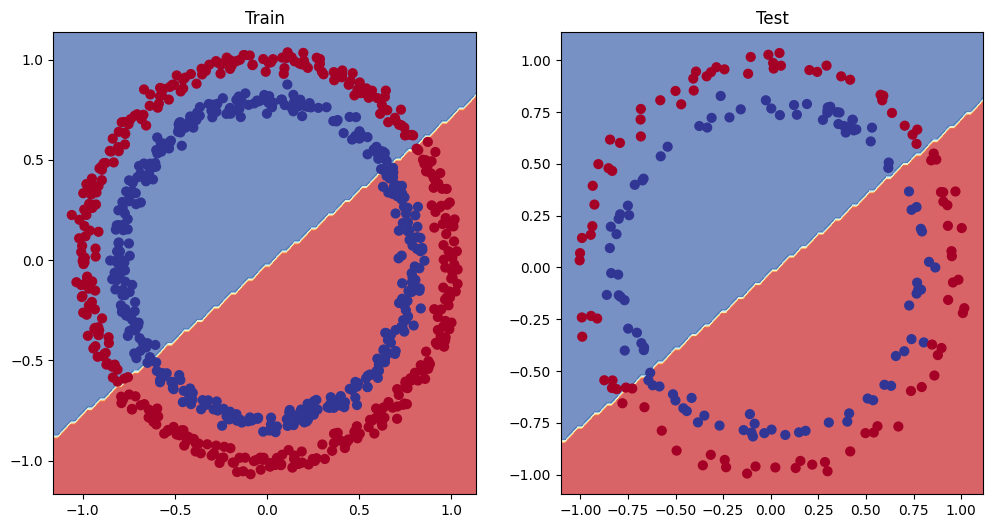

In [41]:
# Plot decision boundary of model

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## Options to improve a model

### Improving a model (a model's perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - give the model more room to learn from the data
* Fit the model for more epochs - the more the model has the opportunity to learn
* Change activation functions
* Change the loss function
* Change the optimizer (Change learning rate, momentum, etc)


These options will be from a model's perspective becuase they will impact how the model learns.

ALl the options are all values (ML and DS ) can change reffered to as **hyperparameters**.

Improving model by:

* Adding more hidden units 5 -> 10
* Increase number of layers 2 -> 3
* Increase number of epochs 100 -. 1000

In [43]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x))) # This way leverages speed ups.

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [44]:
# Create Loss Function
loss_fn = nn.BCEWithLogitsLoss()

# Create Optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [45]:
# Training and Evaluation loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # 2. Calculate loss/ accuracy
  loss = loss_fn(y_logits, # nn.BCEWithLogitsloss expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true=y_train, # Changed here to calculate accuracy with y_pred
              y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    #1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate loss/ accuracy
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
# Print Out whats happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69528, Accuracy: 51.38% | Test Loss: 0.69252, Test Accuracy: 50.50%
Epoch: 100 | Loss: 0.69325, Accuracy: 47.88% | Test Loss: 0.69283, Test Accuracy: 51.00%
Epoch: 200 | Loss: 0.69309, Accuracy: 49.88% | Test Loss: 0.69344, Test Accuracy: 46.50%
Epoch: 300 | Loss: 0.69303, Accuracy: 50.50% | Test Loss: 0.69384, Test Accuracy: 47.50%
Epoch: 400 | Loss: 0.69300, Accuracy: 51.38% | Test Loss: 0.69412, Test Accuracy: 46.50%
Epoch: 500 | Loss: 0.69299, Accuracy: 51.12% | Test Loss: 0.69431, Test Accuracy: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.50% | Test Loss: 0.69444, Test Accuracy: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.38% | Test Loss: 0.69452, Test Accuracy: 45.50%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.50% | Test Loss: 0.69458, Test Accuracy: 44.50%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.38% | Test Loss: 0.69461, Test Accuracy: 45.00%


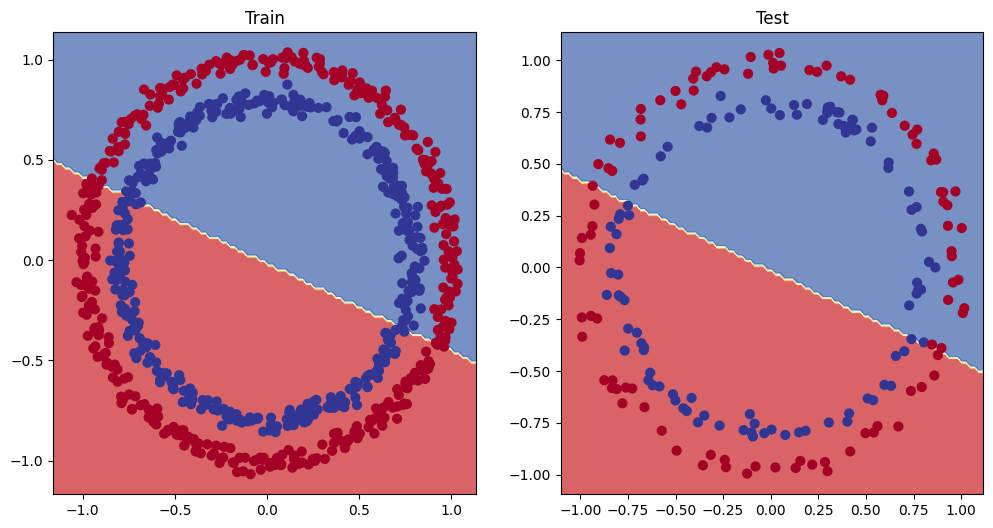

In [46]:
# Plot the decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)